In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


sns.set(style="darkgrid")
%matplotlib inline
from sklearn.model_selection import GridSearchCV , train_test_split , cross_val_score , StratifiedKFold
from sklearn.metrics import roc_curve, auc
import os
import warnings
warnings.filterwarnings('ignore')

In [30]:
train = pd.read_csv('training_dataset.csv' , index_col='Id')
test = pd.read_csv('test_dataset.csv'  , index_col='Id')
val = pd.read_csv('validation_dataset.csv'  , index_col='Id')
num_features = train.iloc[:,1:11]
labels = train.Cover_Type

train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
8192,2976,85,23,95,72,2436,246,193,64,836,...,0,0,0,0,0,0,0,0,0,1
14089,3104,233,12,150,40,1503,200,251,186,1129,...,0,0,0,0,0,0,0,0,0,1
10246,3385,160,7,937,204,1224,228,242,147,752,...,0,0,0,0,0,0,0,0,0,1
8686,3191,41,14,210,37,3207,221,208,119,865,...,1,0,0,0,0,0,0,0,0,1
9242,2821,297,4,85,1,992,208,238,169,242,...,0,0,0,0,0,0,0,0,0,1


In [31]:
print('Number of observations: ', len(train))
print('Number of features: ', len(train.columns) - 1)

Number of observations:  8286
Number of features:  54


In [32]:
print('Number of observations: ', len(test))
print('Number of features: ', len(test.columns) - 1)

Number of observations:  1525
Number of features:  54


In [33]:
# Count the number of instances per class
class_counts = train['Cover_Type'].value_counts()
print('Number of instances per class:')
print(class_counts)

Number of instances per class:
7    1720
5    1569
3    1385
4    1368
6    1036
2     861
1     347
Name: Cover_Type, dtype: int64


In [34]:
train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.00000,8286.000000,...,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000
mean,2732.983104,155.366643,16.868694,225.249698,53.233888,1629.840574,213.732682,218.534999,133.00712,1461.559739,...,0.035723,0.031620,0.001328,0.008810,0.000845,0.003259,0.063481,0.056119,0.040068,4.561550
std,432.906958,108.392758,8.514811,213.670866,62.890107,1259.714393,30.675904,23.142959,46.73019,1053.310891,...,0.185610,0.174996,0.036413,0.093453,0.029055,0.056994,0.243840,0.230165,0.196130,1.789533
min,1863.000000,0.000000,0.000000,0.000000,-134.000000,0.000000,58.000000,99.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2350.000000,66.000000,10.000000,60.000000,5.000000,726.000000,197.000000,206.000000,103.00000,711.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2720.500000,125.000000,16.000000,175.000000,34.000000,1273.000000,221.000000,222.000000,136.00000,1225.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,3099.750000,252.000000,23.000000,323.000000,84.000000,2155.000000,237.000000,235.000000,166.00000,1911.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,50.000000,1343.000000,547.000000,6508.000000,254.000000,254.000000,248.00000,6853.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [35]:
test.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,...,1525.000000,1525.000000,1525.000000,1525.000000,1525.0,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,2735.860984,151.527213,16.545574,231.399344,53.087213,1694.068197,214.243934,218.283279,132.590820,1454.604590,...,0.038033,0.040656,0.002623,0.007869,0.0,0.003279,0.049180,0.041967,0.032787,4.043934
std,430.089563,108.633930,8.511536,222.534352,64.622797,1309.355305,29.533171,23.159036,45.322776,1059.814339,...,0.191338,0.197556,0.051164,0.088386,0.0,0.057185,0.216315,0.200580,0.178137,1.974918
min,1874.000000,0.000000,0.000000,0.000000,-108.000000,30.000000,65.000000,111.000000,0.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2349.000000,62.000000,10.000000,60.000000,6.000000,781.000000,199.000000,206.000000,105.000000,721.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2751.000000,121.000000,15.000000,175.000000,33.000000,1318.000000,221.000000,222.000000,135.000000,1194.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3102.000000,243.000000,22.000000,330.000000,78.000000,2230.000000,236.000000,234.000000,164.000000,1907.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.000000
max,3825.000000,359.000000,46.000000,1260.000000,403.000000,6660.000000,254.000000,254.000000,240.000000,6686.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,7.000000


In [36]:
# Find the number of null values per feature
null_counts = train.isnull().sum()
print('Number of null values per feature:')
print(null_counts)

Number of null values per feature:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_

In [37]:
# Find the number of possible outliers
# We can consider a value to be an outlier if it falls outside the range of mean ± 3 * standard deviation
outliers = pd.DataFrame(columns=['Feature', 'Number of Outliers'])
for col in train.columns[:-1]: # Exclude the target variable
    mean = train[col].mean()
    std = train[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    num_outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)][col].count()
    outliers = outliers.append({'Feature': col, 'Number of Outliers': num_outliers}, ignore_index=True)
print('Number of possible outliers:')
print(outliers)

Number of possible outliers:
                               Feature Number of Outliers
0                            Elevation                  0
1                               Aspect                  0
2                                Slope                 20
3     Horizontal_Distance_To_Hydrology                179
4       Vertical_Distance_To_Hydrology                106
5      Horizontal_Distance_To_Roadways                 99
6                        Hillshade_9am                 92
7                       Hillshade_Noon                 67
8                        Hillshade_3pm                  0
9   Horizontal_Distance_To_Fire_Points                141
10                    Wilderness_Area1                  0
11                    Wilderness_Area2                253
12                    Wilderness_Area3                  0
13                    Wilderness_Area4                  0
14                          Soil_Type1                207
15                          Soil_Type2     

In [38]:
# Perform basic statistical analysis for every feature
stats = pd.DataFrame(columns=['Feature', 'Mean', 'Std', 'Min', 'Max'])
for col in train.columns:
    mean = train[col].mean()
    std = train[col].std()
    minimum = train[col].min()
    maximum = train[col].max()
    stats = stats.append({'Feature': col, 'Mean': mean, 'Std': std, 'Min': minimum, 'Max': maximum}, ignore_index=True)
print('Basic statistical analysis for every feature:')
print(stats)

Basic statistical analysis for every feature:
                               Feature         Mean          Std   Min   Max
0                            Elevation  2732.983104   432.906958  1863  3849
1                               Aspect   155.366643   108.392758     0   360
2                                Slope    16.868694     8.514811     0    50
3     Horizontal_Distance_To_Hydrology   225.249698   213.670866     0  1343
4       Vertical_Distance_To_Hydrology    53.233888    62.890107  -134   547
5      Horizontal_Distance_To_Roadways  1629.840574  1259.714393     0  6508
6                        Hillshade_9am   213.732682    30.675904    58   254
7                       Hillshade_Noon   218.534999    23.142959    99   254
8                        Hillshade_3pm   133.007120    46.730190     0   248
9   Horizontal_Distance_To_Fire_Points  1461.559739  1053.310891     0  6853
10                    Wilderness_Area1     0.206493     0.404813     0     1
11                    Wilderne

In [39]:
skew = train.skew()
skew_df = pd.DataFrame(skew, index=None, columns=['Skewness'])

In [40]:
print(skew)

Elevation                              0.231034
Aspect                                 0.486825
Slope                                  0.481654
Horizontal_Distance_To_Hydrology       1.563164
Vertical_Distance_To_Hydrology         1.489166
Horizontal_Distance_To_Roadways        1.287637
Hillshade_9am                         -1.134396
Hillshade_Noon                        -0.922196
Hillshade_3pm                         -0.311391
Horizontal_Distance_To_Fire_Points     1.597119
Wilderness_Area1                       1.450438
Wilderness_Area2                       5.458321
Wilderness_Area3                       0.287803
Wilderness_Area4                       0.703206
Soil_Type1                             6.088352
Soil_Type2                             4.356065
Soil_Type3                             3.374927
Soil_Type4                             3.614907
Soil_Type5                             9.129863
Soil_Type6                             4.215704
Soil_Type7                             0

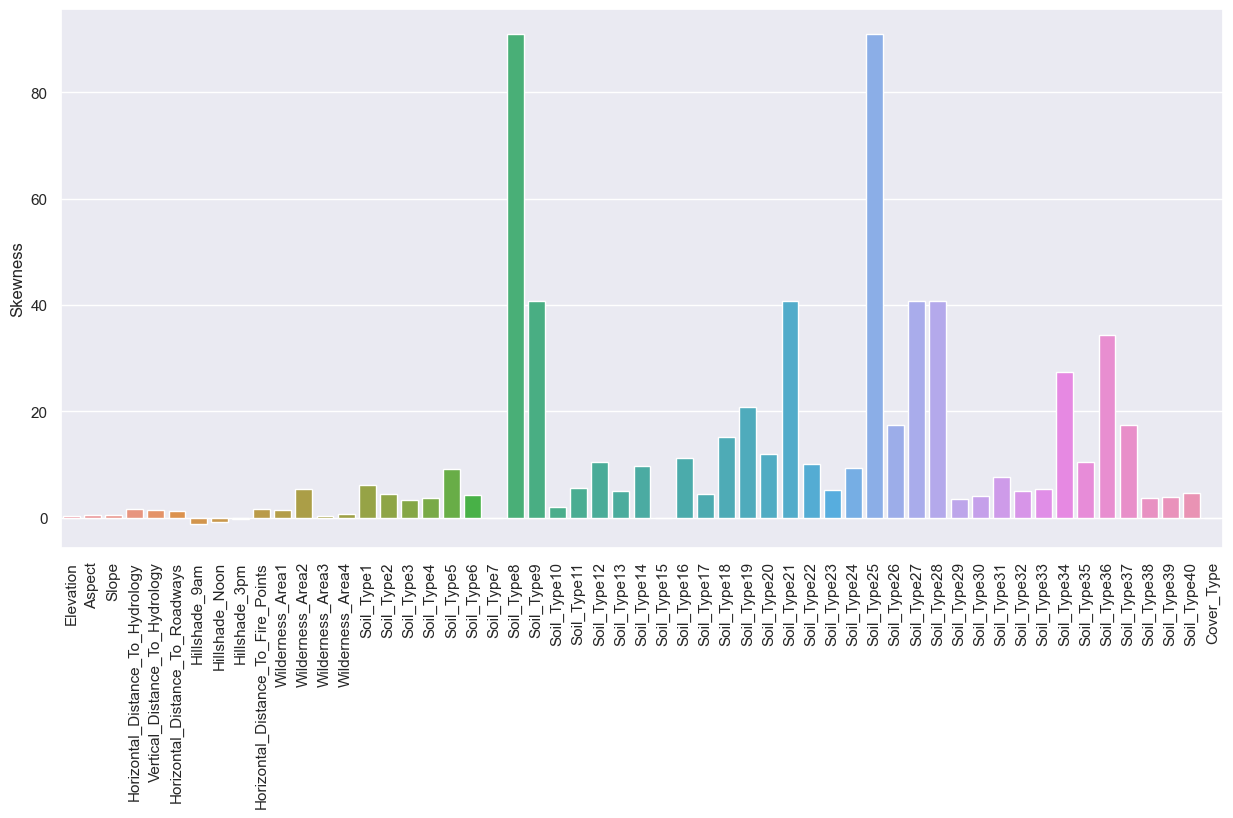

In [41]:
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index, y='Skewness', data=skew_df)
var = plt.xticks(rotation=90)

In [42]:
train.groupby('Cover_Type').size()


Cover_Type
1     347
2     861
3    1385
4    1368
5    1569
6    1036
7    1720
dtype: int64

In [43]:
cols = train.columns
r,c = train.shape

# Create a new dataframe with r rows, one column for each encoded category[Wilderness_Area(1-4),Soil_type[1-40], and target in the end
new_train = pd.DataFrame(index= np.arange(0,r), columns=['Wilderness_Area','Soil_Type', 'Cover_Type'])

In [44]:
# make an entry in data for each r for category_id, target_value
for i in range(0,r):
    p = 0;
    q = 0;
    # wilderness_area range
    for j in range(11,15):
        if (train.iloc[i,j] == 1):
            p = j-10
            break
    # soil_type range
    for k in range(15,55):
        if (train.iloc[i,k] == 1):
            q = k-14
            break
    # make entry in data for each r
    new_train.iloc[i] = [p,q,train.iloc[i, c-1]]

In [45]:
st_by_ct = pd.crosstab(new_train['Cover_Type'], new_train['Soil_Type'])


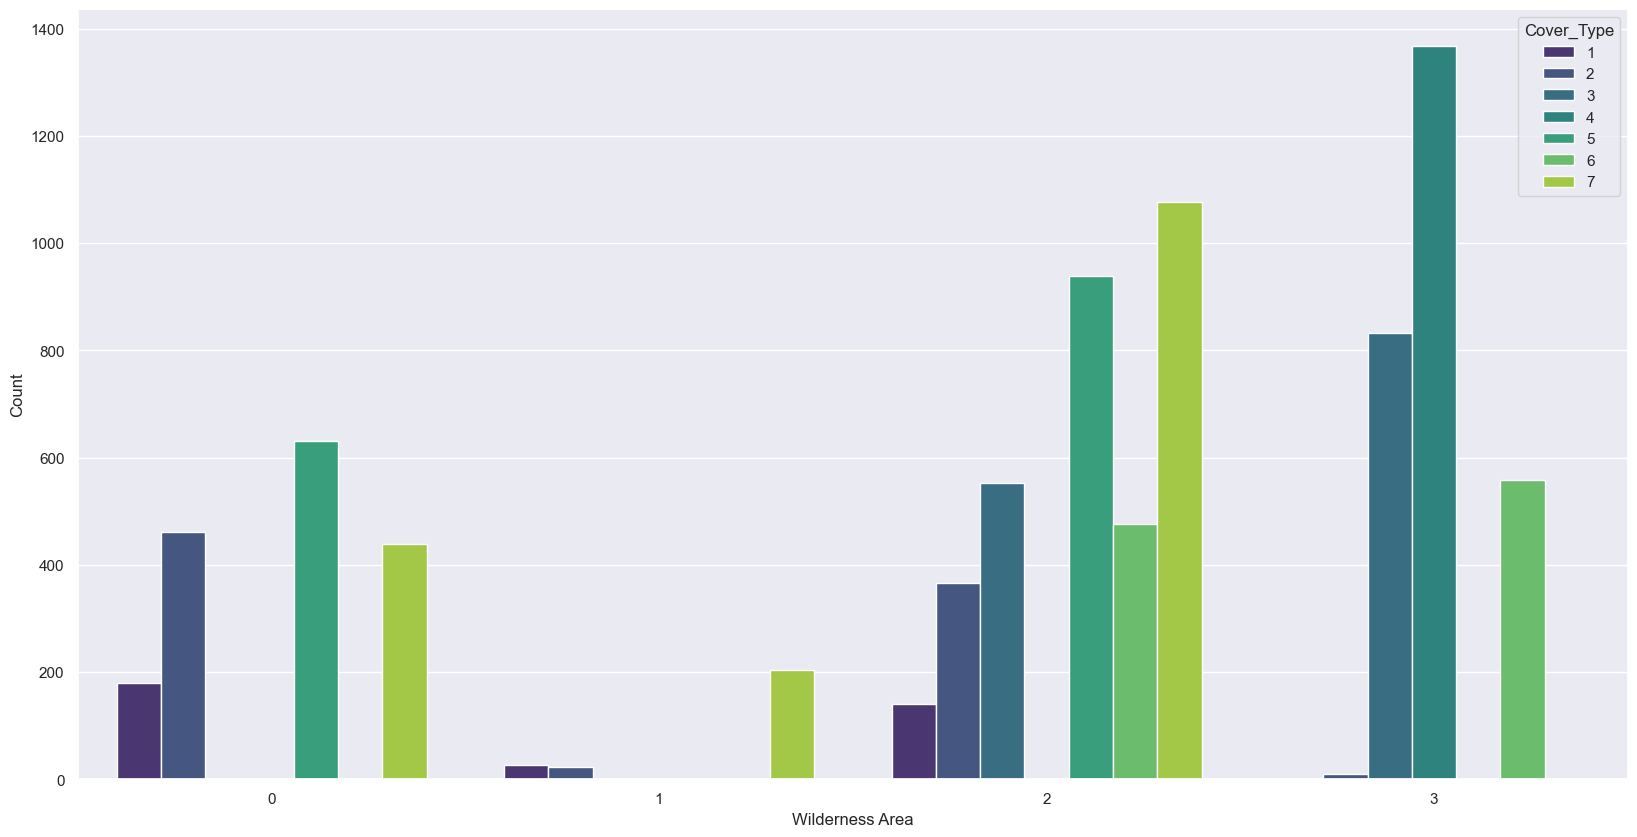

In [46]:
# plot wilderness_area by cover_type
plt.figure(figsize = [20,10])
sns.countplot(x='Wilderness_Area',palette='viridis', hue='Cover_Type', data=new_train)
plt.xlabel('Wilderness Area')
plt.ylabel('Count')
plt.show()

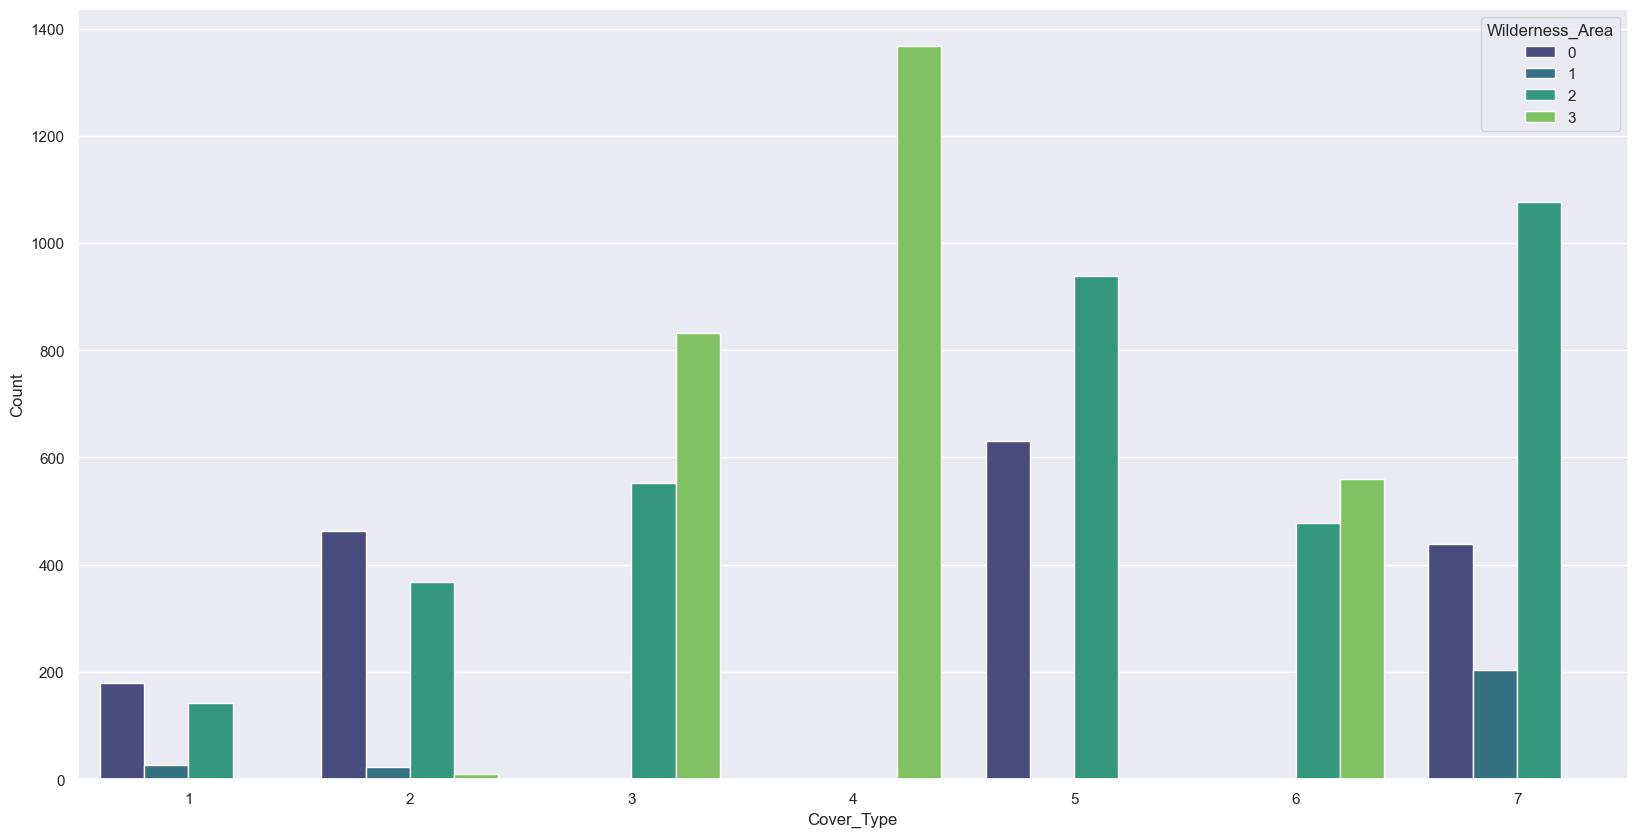

In [47]:
# plot cover_type by wilderness_area
plt.figure(figsize = [20,10])
sns.countplot(x='Cover_Type',palette='viridis', hue='Wilderness_Area', data=new_train)
plt.xlabel('Cover_Type')
plt.ylabel('Count')
plt.show()

In [48]:
st_by_ct = pd.crosstab(new_train['Cover_Type'], new_train['Soil_Type'])


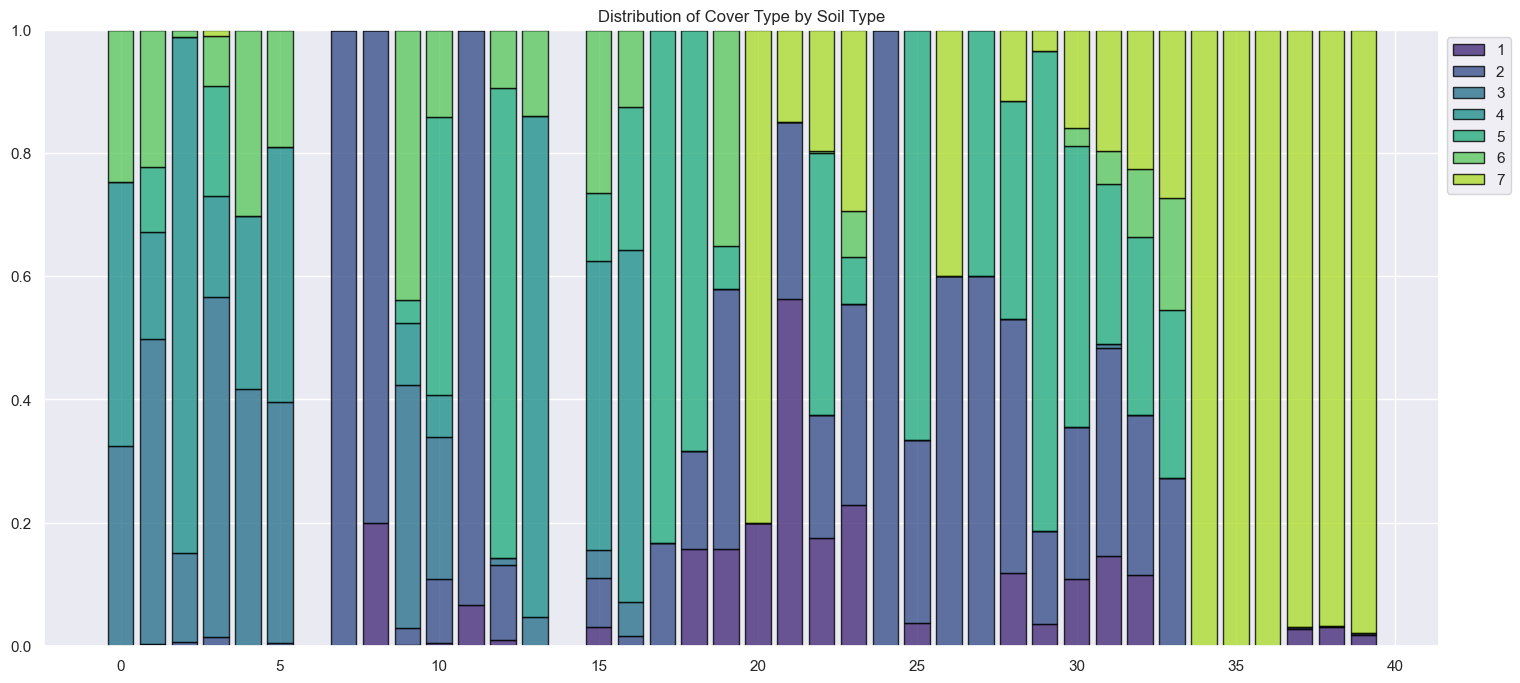

In [49]:
st_by_ct_props = st_by_ct/np.sum(st_by_ct)
bb = np.cumsum(st_by_ct_props) - st_by_ct_props 

palette = sns.color_palette('viridis', len(st_by_ct_props))
plt.figure(figsize=[18, 8])
for row_indx in range(len(st_by_ct_props)):
    plt.bar(st_by_ct_props.columns.values,
            st_by_ct_props.iloc[row_indx].values,
            bottom=bb.iloc[row_indx].values,
            color=palette[row_indx],
            alpha=0.8,
            edgecolor='black',
            label=st_by_ct_props.index[row_indx])
plt.title('Distribution of Cover Type by Soil Type')
plt.legend(bbox_to_anchor=(1, 1))

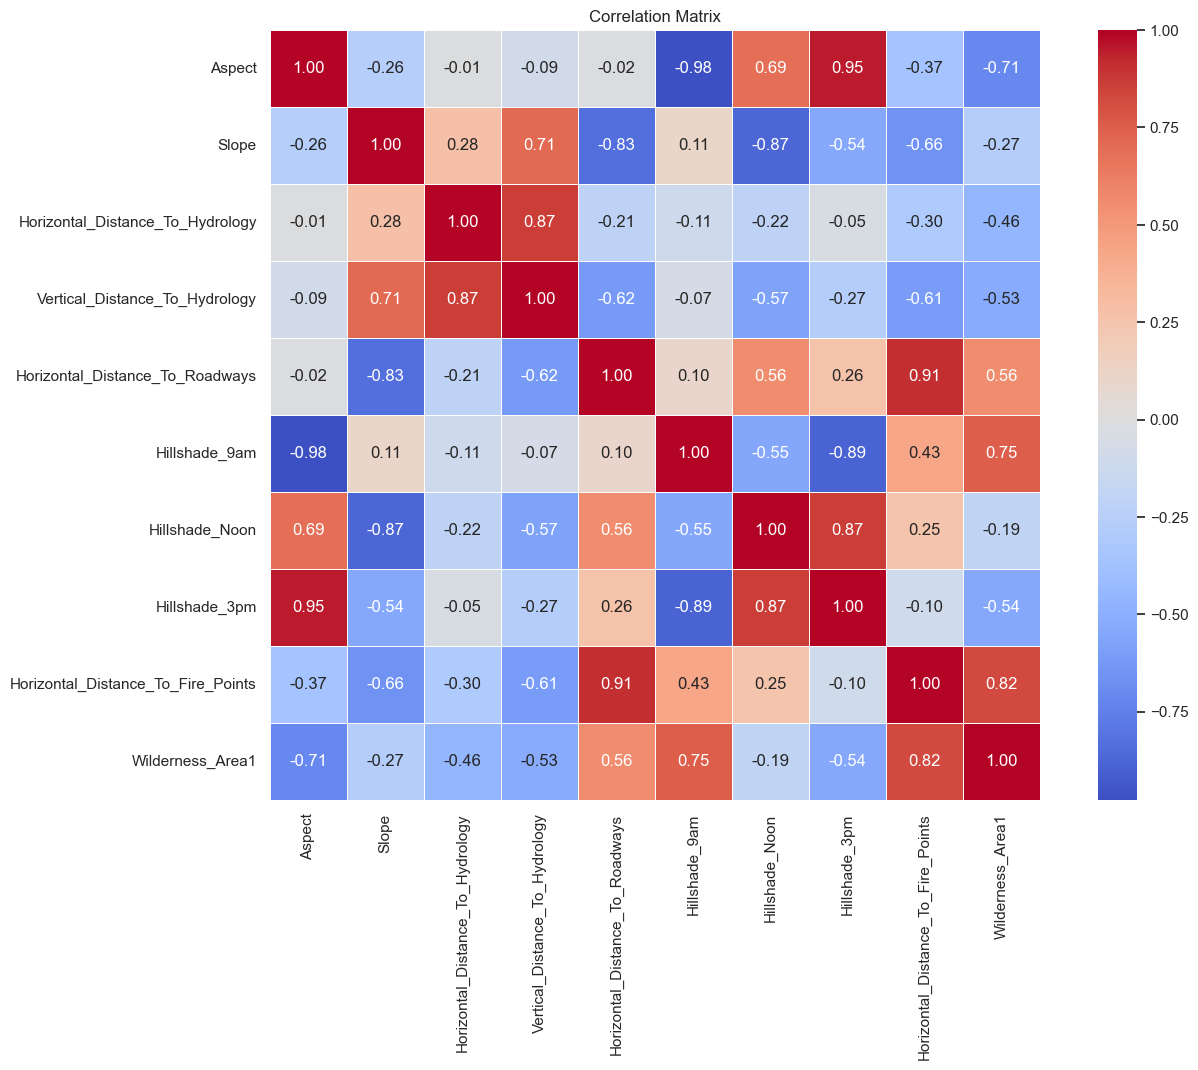

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# calculate correlation matrix
num_features = num_features.corr()

# generate mask for upper triangle
mask = np.zeros_like(num_features, dtype=np.bool)

# create subplot and heatmap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(num_features, mask=mask, cmap='coolwarm', center=0, square=True, annot=True, fmt='.2f', linewidths=.5, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

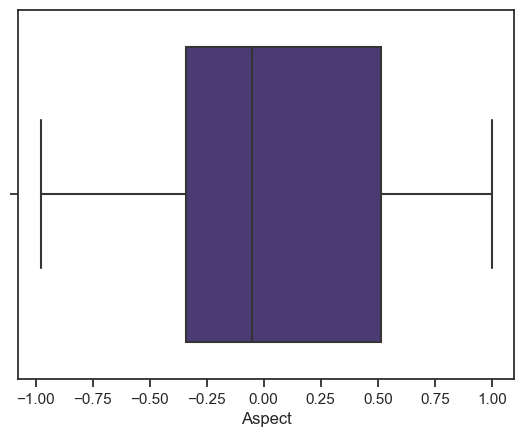

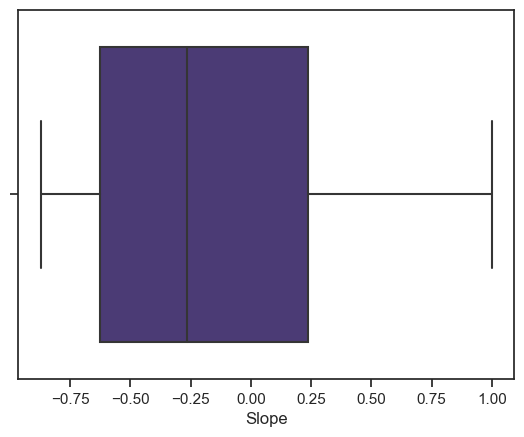

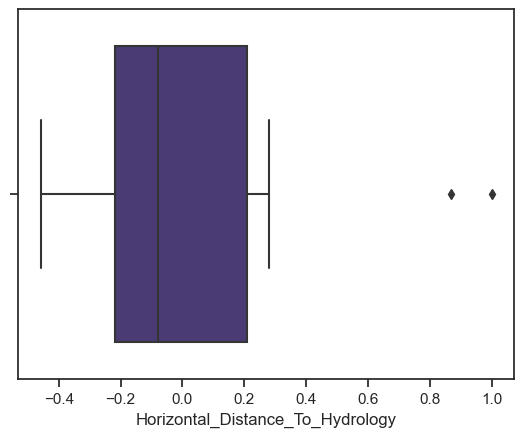

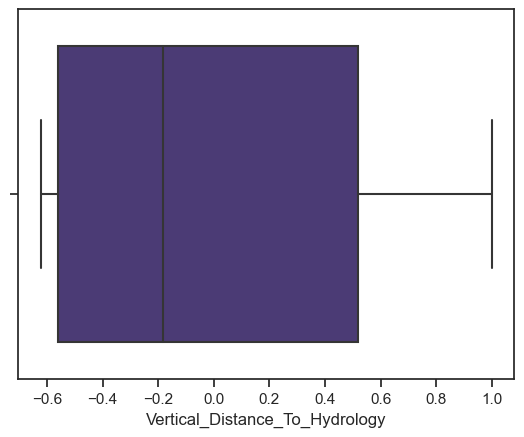

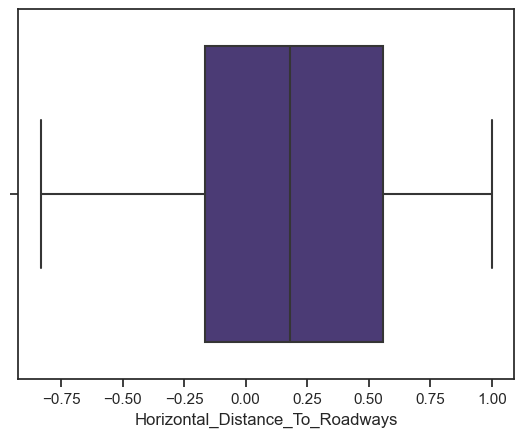

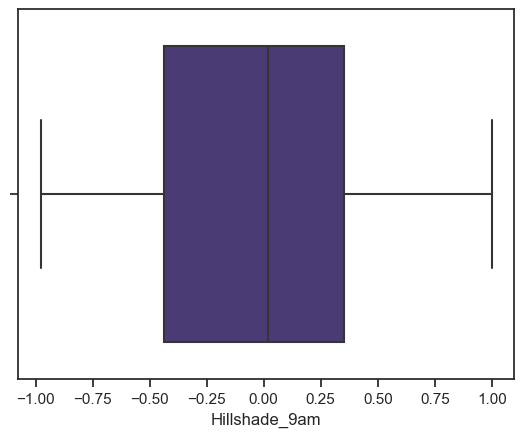

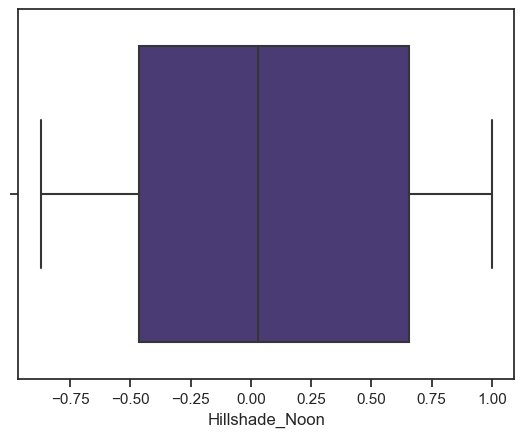

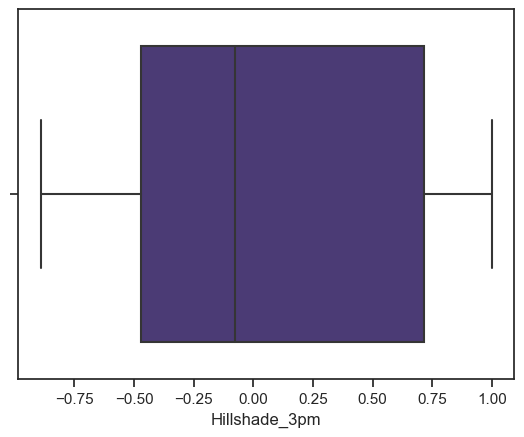

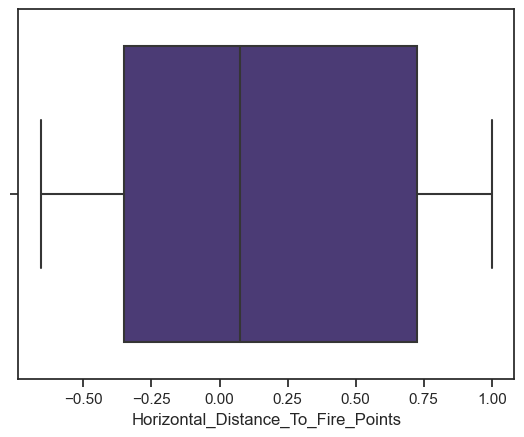

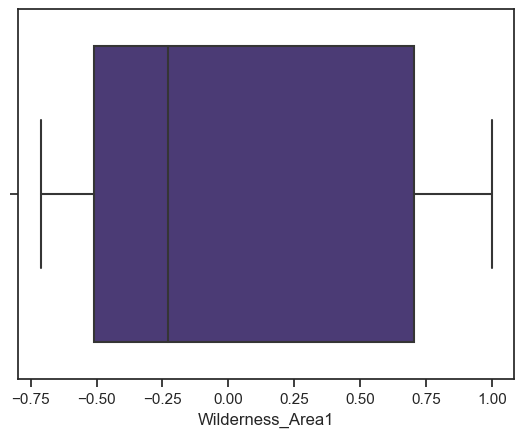

In [53]:
# Create a boxplot for each numeric feature
sns.set(style="ticks", palette="viridis")
for col in num_features.columns:
    sns.boxplot(x=num_features[col])
    plt.show()

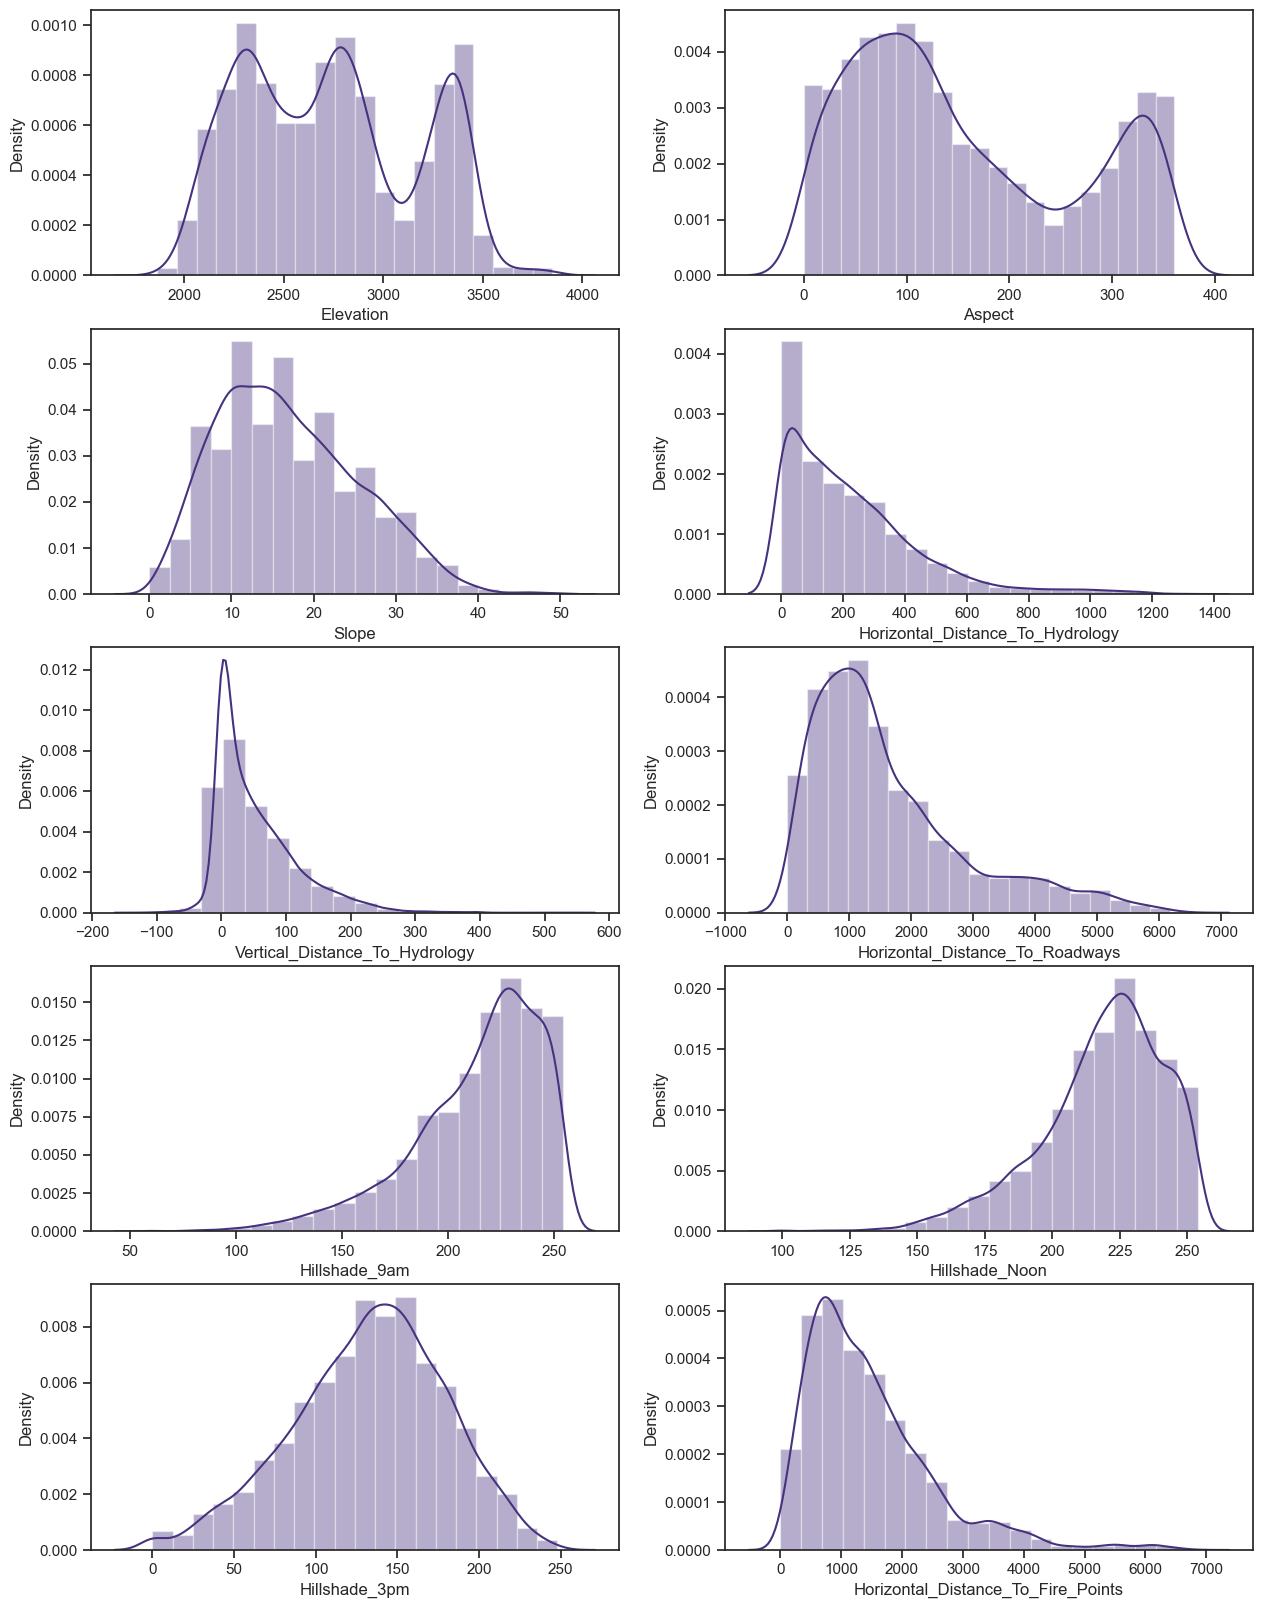

In [54]:
fig, ax = plt.subplots(5,2, figsize=(15,20))

sns.distplot(train.Elevation, bins=20, ax=ax[0,0])
sns.distplot(train.Aspect, bins=20, ax=ax[0,1])
sns.distplot(train.Slope, bins = 20, ax=ax[1,0]) 
sns.distplot(train.Horizontal_Distance_To_Hydrology, bins = 20, ax=ax[1,1])
sns.distplot(train.Vertical_Distance_To_Hydrology, bins = 20, ax=ax[2,0]) 
sns.distplot(train.Horizontal_Distance_To_Roadways, bins = 20, ax=ax[2,1]) 
sns.distplot(train.Hillshade_9am, bins = 20, ax=ax[3,0]) 
sns.distplot(train.Hillshade_Noon, bins = 20, ax=ax[3,1])
sns.distplot(train.Hillshade_3pm, bins = 20, ax=ax[4,0])
sns.distplot(train.Horizontal_Distance_To_Fire_Points, bins = 20, ax=ax[4,1])
plt.show()

In [105]:
import numpy as np
from scipy import stats

def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(train))
    filtered_data = data[(z_scores < threshold).all(axis=1)]
    return filtered_data

# Example usage
# Assuming you have a dataset stored in a NumPy array called 'data'
filtered_data = remove_outliers_zscore(train)

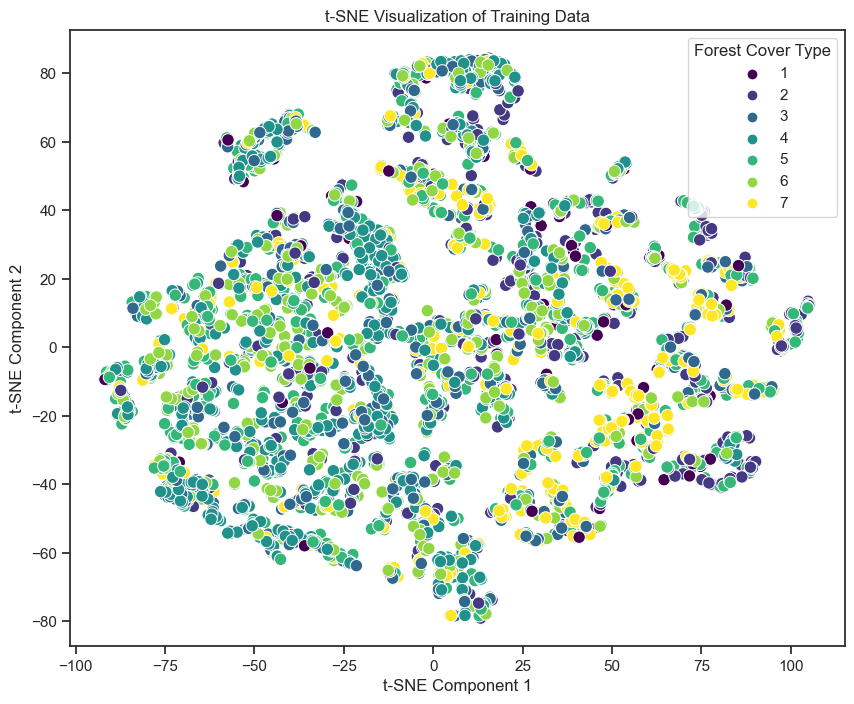

In [55]:
# Assuming you have loaded your training data into a DataFrame called 'df_train'
# And the target variable is stored in the column 'Cover_Type'

# Separate the features and target variable
X_train = train.drop('Cover_Type', axis=1)
y_train = train['Cover_Type']

# Perform t-SNE on the training data
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Create a DataFrame for t-SNE visualization
df_tsne = pd.DataFrame(X_train_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])
df_tsne['Cover_Type'] = y_train

# Plot t-SNE visualization for training data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='Cover_Type', data=df_tsne, palette='viridis', s=80)
plt.title('t-SNE Visualization of Training Data')
plt.legend(title='Forest Cover Type', loc='upper right')
plt.show()

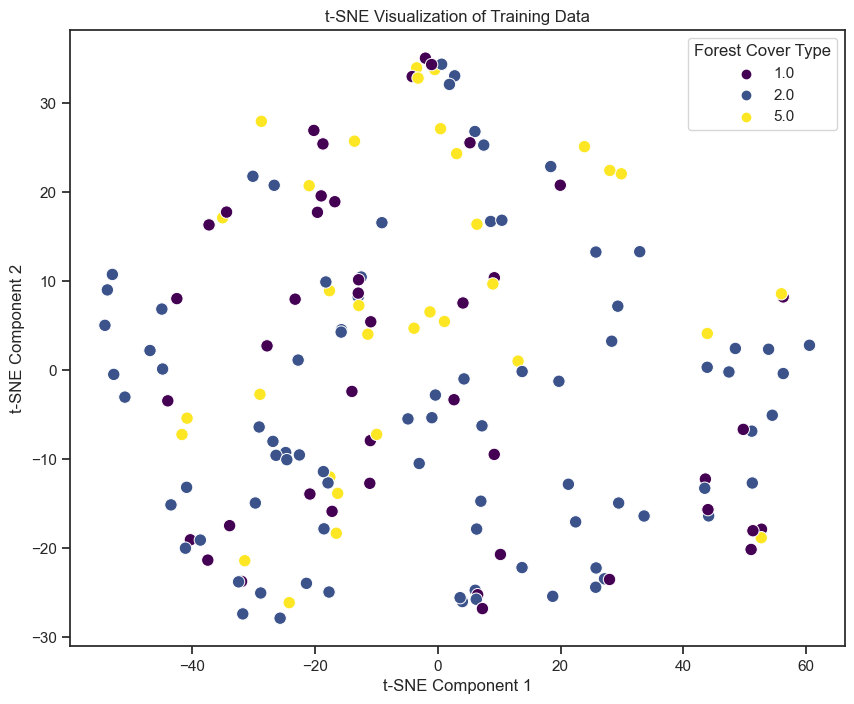

In [56]:
# Assuming you have loaded your training data into a DataFrame called 'df_train'
# And the target variable is stored in the column 'Cover_Type'

# Separate the features and target variable
X_test = test.drop('Cover_Type', axis=1)
y_test = test['Cover_Type']

# Perform t-SNE on the training data
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test)

# Create a DataFrame for t-SNE visualization
df_tsne = pd.DataFrame(X_test_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])
df_tsne['Cover_Type'] = y_test

# Plot t-SNE visualization for training data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='Cover_Type', data=df_tsne, palette='viridis', s=80)
plt.title('t-SNE Visualization of Training Data')
plt.legend(title='Forest Cover Type', loc='upper right')
plt.show()

In [57]:
# Initialize the classifiers
knn = KNeighborsClassifier()
logreg = LogisticRegression()
svm = SVC()
dt = DecisionTreeClassifier()
nb = GaussianNB()

# Fit the classifiers on the training data
knn.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train)
nb.fit(X_train, y_train)

GaussianNB()

In [58]:
# Predict the target variable for the test data
y_pred_knn = knn.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_nb = nb.predict(X_test)

In [59]:
# Calculate the accuracy for each method
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

In [60]:
# Create confusion matrix for each method
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_nb = confusion_matrix(y_test, y_pred_nb)

Text(217.25, 0.5, 'Actual')

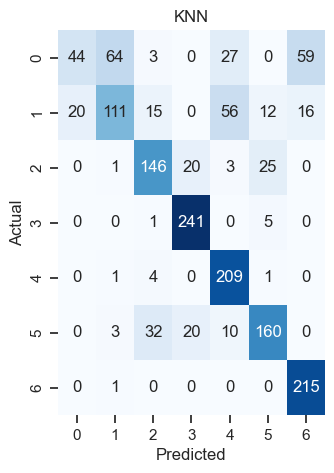

In [61]:
# Plot confusion matrix for each method
plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(537.9396551724138, 0.5, 'Actual')

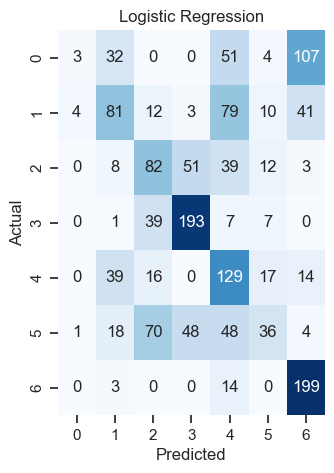

In [62]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 2)
sns.heatmap(cm_logreg, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(858.6293103448277, 0.5, 'Actual')

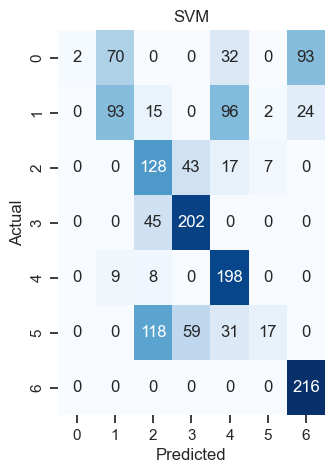

In [63]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 3)
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(1179.3189655172416, 0.5, 'Actual')

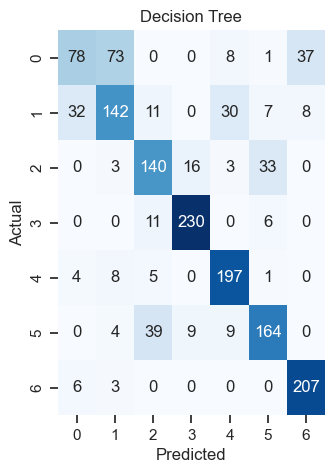

In [64]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 4)
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')



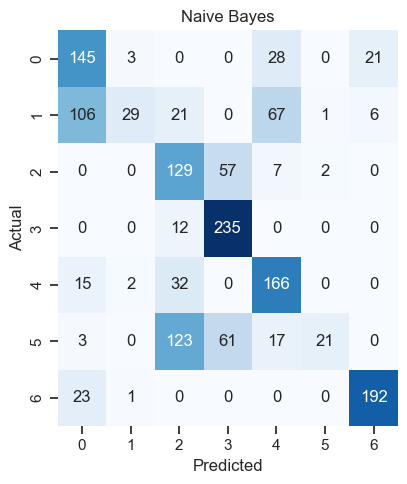

In [65]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 5)
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

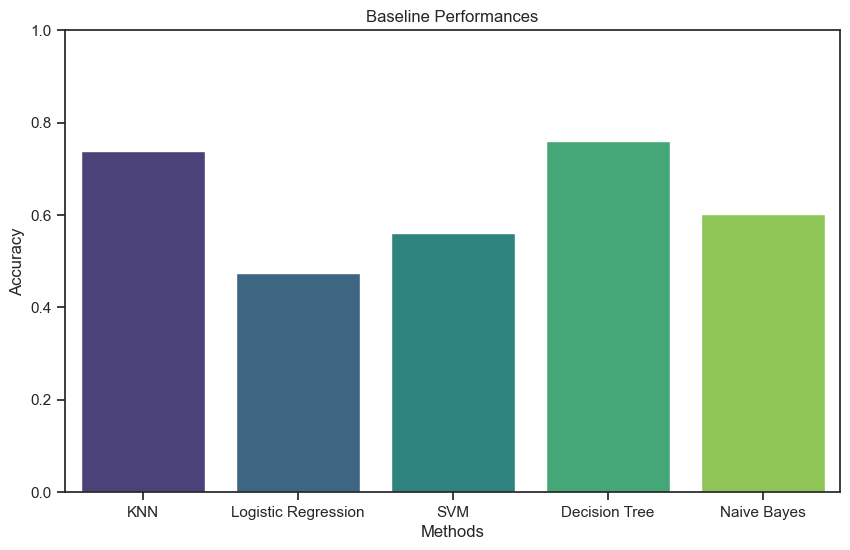

In [66]:
# Create a bar chart for baseline performances
methods = ['KNN', 'Logistic Regression', 'SVM', 'Decision Tree', 'Naive Bayes']
accuracies = [accuracy_knn, accuracy_logreg, accuracy_svm, accuracy_dt, accuracy_nb]

plt.figure(figsize=(10, 6))
sns.barplot(x=methods, y=accuracies, palette='viridis')
plt.title('Baseline Performances')
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [67]:
print(accuracy_dt)

0.759344262295082


In [68]:
print(accuracy_knn)

0.7383606557377049


In [69]:
print(accuracy_nb)

0.6013114754098361


In [70]:
print(accuracy_logreg)

0.4740983606557377


In [71]:
print(accuracy_svm)

0.5613114754098361


# Q2

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the classifiers
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()


# Initialize the number of features to evaluate
num_features = range(5, min(55, len(X_train.columns)), 5)

# Initialize a dictionary to store the names of the selected features for each method and each model
selected_features = {}

In [73]:
# Train the two best-performing ML models from Q1 stage on the original feature set
dt_baseline = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
knn_baseline = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

# Apply filter-based feature selection using SelectKBest
k_values = range(1, X_train.shape[1] + 1)
dt_acc_fs_kbest = []
knn_acc_fs_kbest = []
for k in k_values:
    skb = SelectKBest(k=k)
    X_train_fs = skb.fit_transform(X_train, y_train)
    X_test_fs = skb.transform(X_test)
    dt_fs = DecisionTreeClassifier(random_state=1).fit(X_train_fs, y_train)
    knn_fs = KNeighborsClassifier(n_neighbors=5).fit(X_train_fs, y_train)
    dt_acc_fs_kbest.append(accuracy_score(y_test, dt_fs.predict(X_test_fs)))
    knn_acc_fs_kbest.append(accuracy_score(y_test, knn_fs.predict(X_test_fs)))


In [83]:
# Apply wrapper-based feature selection using RFE
n_features_values = range(1, X_train.shape[1] + 1)
dt_acc_fs_rfe = []
knn_acc_fs_rfe = []
for n_features in n_features_values:
    dt = DecisionTreeClassifier(random_state=1)
    rfe_dt = RFE(dt, n_features_to_select=n_features)
    rfe_dt.fit(X_train, y_train)
    X_train_fs = rfe_dt.transform(X_train)
    X_test_fs = rfe_dt.transform(X_test)
    dt_fs = DecisionTreeClassifier(random_state=1).fit(X_train_fs, y_train)
    knn_fs = KNeighborsClassifier(n_neighbors=5).fit(X_train_fs, y_train)
    dt_acc_fs_rfe.append(accuracy_score(y_test, dt_fs.predict(X_test_fs)))
    knn_acc_fs_rfe.append(accuracy_score(y_test, knn_fs.predict(X_test_fs)))

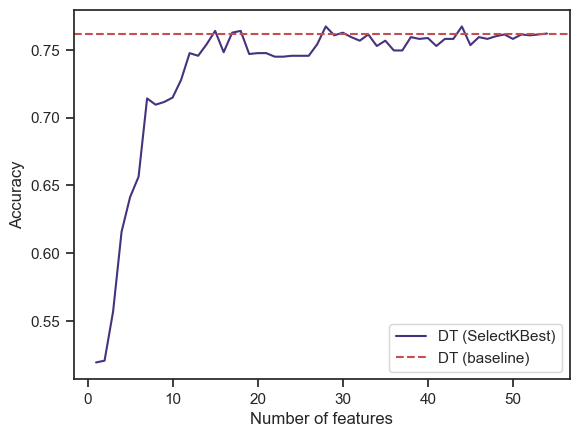

In [84]:
# Plot the results for filter-based feature selection using SelectKBest
plt.plot(k_values, dt_acc_fs_kbest, label='DT (SelectKBest)')
plt.axhline(y=accuracy_score(y_test, dt_baseline.predict(X_test)), linestyle='--', color='r', label='DT (baseline)')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [85]:
print(dt_acc_fs_kbest)

[0.519344262295082, 0.520655737704918, 0.5567213114754098, 0.6157377049180328, 0.641311475409836, 0.6563934426229509, 0.7140983606557377, 0.7095081967213115, 0.7114754098360656, 0.7147540983606557, 0.7278688524590164, 0.7475409836065574, 0.7455737704918033, 0.7540983606557377, 0.7639344262295082, 0.7481967213114754, 0.7626229508196721, 0.7639344262295082, 0.7468852459016393, 0.7475409836065574, 0.7475409836065574, 0.7449180327868853, 0.7449180327868853, 0.7455737704918033, 0.7455737704918033, 0.7455737704918033, 0.7540983606557377, 0.7672131147540984, 0.760655737704918, 0.7626229508196721, 0.759344262295082, 0.7567213114754099, 0.761311475409836, 0.7527868852459016, 0.7567213114754099, 0.7495081967213115, 0.7495081967213115, 0.759344262295082, 0.7580327868852459, 0.7586885245901639, 0.7527868852459016, 0.7580327868852459, 0.7580327868852459, 0.7672131147540984, 0.7534426229508197, 0.759344262295082, 0.7580327868852459, 0.76, 0.761311475409836, 0.7580327868852459, 0.761311475409836, 0.7

In [86]:
len(dt_acc_fs_kbest)

54

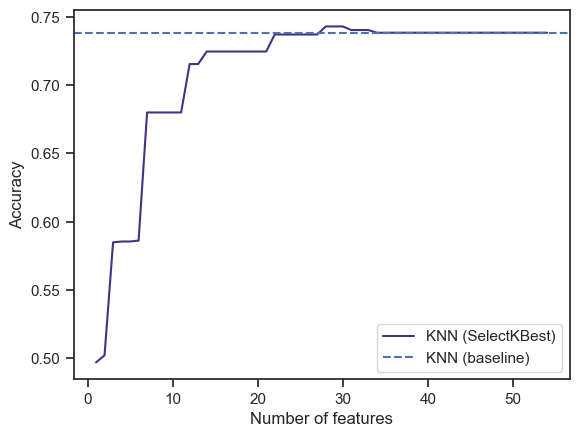

In [87]:
# Plot the results for filter-based feature selection using SelectKBest
plt.plot(k_values, knn_acc_fs_kbest, label='KNN (SelectKBest)')
plt.axhline(y=accuracy_score(y_test, knn_baseline.predict(X_test)), linestyle='--', color='b', label='KNN (baseline)')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [88]:
print(knn_acc_fs_kbest)

[0.4970491803278689, 0.5022950819672131, 0.5849180327868853, 0.5855737704918033, 0.5855737704918033, 0.5862295081967213, 0.68, 0.68, 0.68, 0.68, 0.68, 0.7154098360655737, 0.7154098360655737, 0.7245901639344262, 0.7245901639344262, 0.7245901639344262, 0.7245901639344262, 0.7245901639344262, 0.7245901639344262, 0.7245901639344262, 0.7245901639344262, 0.7370491803278688, 0.7370491803278688, 0.7370491803278688, 0.7370491803278688, 0.7370491803278688, 0.7370491803278688, 0.7429508196721312, 0.7429508196721312, 0.7429508196721312, 0.740327868852459, 0.740327868852459, 0.740327868852459, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557

In [89]:
len(knn_acc_fs_kbest)

54

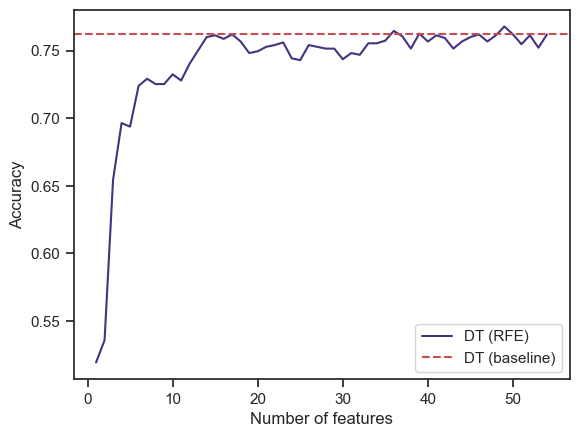

In [90]:
# Plot the results for wrapper-based feature selection using RFE
plt.plot(n_features_values, dt_acc_fs_rfe, label='DT (RFE)')
plt.axhline(y=accuracy_score(y_test, dt_baseline.predict(X_test)), linestyle='--', color='r', label='DT (baseline)')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [91]:
print(dt_acc_fs_rfe)

[0.519344262295082, 0.5357377049180327, 0.6544262295081967, 0.6963934426229508, 0.6937704918032787, 0.7239344262295082, 0.7291803278688525, 0.7252459016393442, 0.7252459016393442, 0.7324590163934426, 0.7278688524590164, 0.740327868852459, 0.7501639344262295, 0.76, 0.761311475409836, 0.7586885245901639, 0.7619672131147541, 0.7567213114754099, 0.7481967213114754, 0.7495081967213115, 0.7527868852459016, 0.7540983606557377, 0.7560655737704918, 0.7442622950819672, 0.7429508196721312, 0.7540983606557377, 0.7527868852459016, 0.7514754098360655, 0.7514754098360655, 0.7436065573770492, 0.7481967213114754, 0.7468852459016393, 0.7554098360655738, 0.7554098360655738, 0.7573770491803279, 0.7645901639344262, 0.760655737704918, 0.7514754098360655, 0.7626229508196721, 0.7567213114754099, 0.761311475409836, 0.759344262295082, 0.7514754098360655, 0.7567213114754099, 0.76, 0.7619672131147541, 0.7567213114754099, 0.761311475409836, 0.7678688524590164, 0.7619672131147541, 0.7547540983606558, 0.761311475409

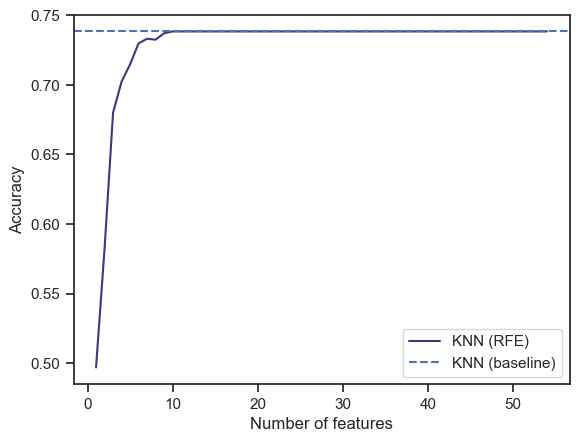

In [92]:
# Plot the results for wrapper-based feature selection using RFE
plt.plot(n_features_values, knn_acc_fs_rfe, label='KNN (RFE)')
plt.axhline(y=accuracy_score(y_test, knn_baseline.predict(X_test)), linestyle='--', color='b', label='KNN (baseline)')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [93]:
print(knn_acc_fs_rfe)

[0.4970491803278689, 0.5822950819672131, 0.68, 0.7022950819672131, 0.7147540983606557, 0.7298360655737705, 0.7331147540983607, 0.7324590163934426, 0.7370491803278688, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.7383606557377049, 0.73836065573

 from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import f_classif

k = np.argmax(dt_acc_fs_kbest) + 1

selector = SelectKBest(score_func=f_classif, k=k)
X_train_dt = selector.fit_transform(X_train, y_train)
X_test_dt = selector.transform(X_test)

# Q3

In [94]:
# Separate the features and target variable
X_train = train.drop('Cover_Type', axis=1)
y_train = train['Cover_Type']

# Separate the features and target variable
X_test = test.drop('Cover_Type', axis=1)
y_test = test['Cover_Type']

# Separate the features and target variable
X_val = val.drop('Cover_Type', axis=1)
y_val = val['Cover_Type']


In [95]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_val = val.drop('Cover_Type', axis=1)  
y_val = val['Cover_Type'] 

# Create and train the Random Forest classifier on the training set
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf_val = rf_classifier.predict(X_val)

# Calculate accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_pred_rf_val)
print("Validation Set Accuracy:", accuracy_val)

# Make predictions on the test set
y_pred_rf_test = rf_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_rf_test)
print("Test Set Accuracy:", accuracy_test)

Validation Set Accuracy: 0.8057409879839786
Test Set Accuracy: 0.8104918032786885


In [96]:
from sklearn.ensemble import ExtraTreesClassifier

# Create and train the ExtraTrees classifier
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = et_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("ExtraTrees Accuracy:", accuracy)

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

ExtraTrees Accuracy: 0.8111475409836065
Confusion Matrix:
[[ 87  75   0   0   9   0  26]
 [ 17 160   9   0  37   3   4]
 [  0   0 162  16   2  15   0]
 [  0   0   1 244   0   2   0]
 [  0   4   4   0 207   0   0]
 [  0   2  37  17   4 165   0]
 [  3   1   0   0   0   0 212]]


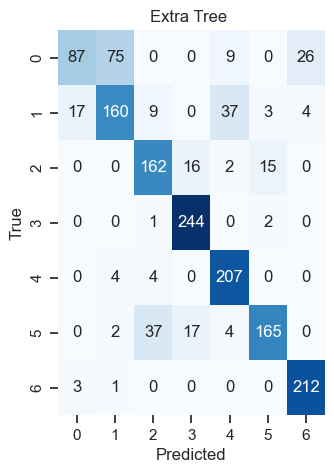

In [97]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Extra Tree ')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [98]:

from sklearn.ensemble import GradientBoostingClassifier

# Create and train the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Accuracy:", accuracy)
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Gradient Boosting Accuracy: 0.7698360655737705
Confusion Matrix:
[[ 78  60   0   0  14   0  45]
 [ 21 140   8   0  47   6   8]
 [  0   0 149  16   5  25   0]
 [  0   0   6 239   0   2   0]
 [  0   2   5   0 205   3   0]
 [  0   2  50  12  13 148   0]
 [  1   0   0   0   0   0 215]]


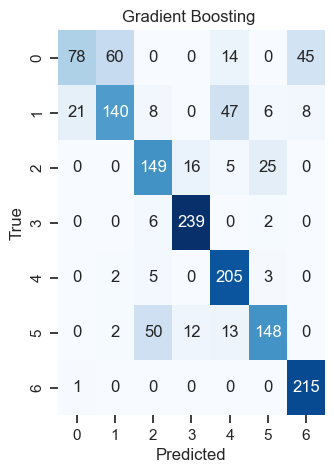

In [99]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Gradient Boosting ')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Q4

In [100]:
!pip install minisom

In [101]:
# Check unique labels in y_train
unique_labels = np.unique(y_train)
print("Unique labels in y_train:", unique_labels)

# Ensure labels start from 0
y_train -= np.min(y_train)

# Check unique labels after fixing
unique_labels = np.unique(y_train)
print("Unique labels in y_train after fixing:", unique_labels)

# Make sure output_classes matches the actual number of classes
output_classes = len(unique_labels)
# Ensure labels start from 0
y_val -= np.min(y_val)
y_test -= np.min(y_test)

Unique labels in y_train: [1 2 3 4 5 6 7]
Unique labels in y_train after fixing: [0 1 2 3 4 5 6]


In [102]:

from minisom import MiniSom
from sklearn.preprocessing import StandardScaler

# Assuming you have already scaled the features and reduced the dimensionality using PCA
# X_train_scaled, X_test_pca are the PCA-transformed training and test data
# ...

# List of grid sizes (number of neurons) to be used for SOFM
grid_sizes = [6,7, 8, 9, 10, 11, 12]

# Dictionary to store SOM instances for each grid size
som_instances = {}

# Scale the features using StandardScaler
scaler = StandardScaler()
x_val_scaled = scaler.fit_transform(X_val)

# Train and store SOM instances for each grid size
for num_neurons in grid_sizes:
    som = MiniSom(num_neurons, num_neurons, X_train_scaled.shape[1], sigma=0.3, learning_rate=0.3)
    som.random_weights_init(X_train_scaled)
    som.train_random(X_train_scaled, 100)  # Adjust the number of epochs as needed
    som_instances[num_neurons] = som

# Get BMU assignments (predictions) for the training data
train_predictions = []
val_predictions =[]
for num_neurons in grid_sizes:
    som = som_instances[num_neurons]
    bmu_indices = np.array([som.winner(x) for x in X_train_scaled]).T
    bmu_indices = np.ravel_multi_index(bmu_indices, (num_neurons, num_neurons))
    train_predictions.append(bmu_indices)

for num_neurons in grid_sizes:
    som = som_instances[num_neurons]
    bmu_indices = np.array([som.winner(x) for x in x_val_scaled]).T
    bmu_indices = np.ravel_multi_index(bmu_indices, (num_neurons, num_neurons))
    val_predictions.append(bmu_indices)
# Get BMU assignments (predictions) for the test data
test_predictions = []
for num_neurons in grid_sizes:
    som = som_instances[num_neurons]
    bmu_indices = np.array([som.winner(x) for x in X_test_scaled]).T
    bmu_indices = np.ravel_multi_index(bmu_indices, (num_neurons, num_neurons))
    test_predictions.append(bmu_indices)

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


best_accuracies = []


y_train_encoded = to_categorical(y_train, num_classes=7)
y_val_encoded = to_categorical(y_val, num_classes=7)
y_test_encoded = to_categorical(y_test, num_classes=7)



for everyList in range(len(train_predictions)):
    X_combined = pd.DataFrame((train_predictions[everyList], y_pred_rf_val)).transpose()
    X_combined_val = pd.DataFrame((val_predictions[everyList], y_pred_rf_val)).transpose()

    model = Sequential()
    model.add(Dense(30, input_shape=(X_combined.shape[1],), activation='tanh'))
    model.add(Dense(30, activation='tanh'))
    model.add(Dense(30, activation='tanh'))
    model.add(Dense(30, activation='tanh'))
    model.add(Dense(7, activation='sigmoid'))

    learning_rate = 0.001
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    X_combined_val_array = X_combined_val.values

    history = model.fit(X_combined, y_train_encoded, epochs=10,validation_data=(X_combined_val_array, y_val_encoded))

    best_accuracy = max(history.history['accuracy'])  # Get the best accuracy from the training history
    best_accuracies.append(best_accuracy)

Epoch 1/10
259/259 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0418 - val_loss: nan - val_accuracy: 0.1495
Epoch 2/10
259/259 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0419 - val_loss: nan - val_accuracy: 0.1495
Epoch 3/10
259/259 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0419 - val_loss: nan - val_accuracy: 0.1495
Epoch 4/10
259/259 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0419 - val_loss: nan - val_accuracy: 0.1495
Epoch 5/10
259/259 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0419 - val_loss: nan - val_accuracy: 0.1495
Epoch 6/10
259/259 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0419 - val_loss: nan - val_accuracy: 0.1495
Epoch 7/10
259/259 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0419 - val_loss: nan - val_accuracy: 0.1495
Epoch 8/10
259/259 [============================

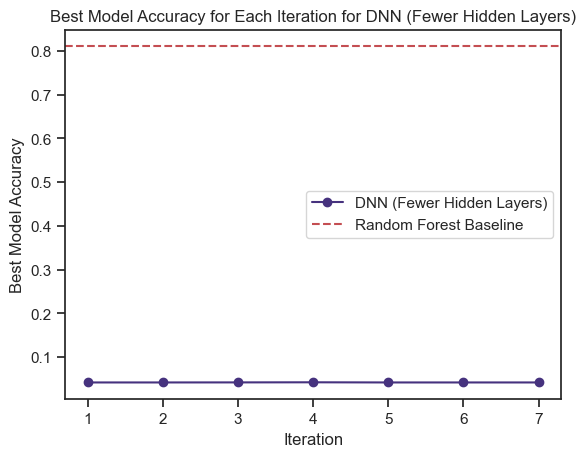

In [107]:
# Plotting the results
plt.figure()
plt.plot(range(1, len(best_accuracies) + 1), best_accuracies, marker='o', label='DNN (Fewer Hidden Layers)')
plt.axhline(accuracy_test, color='r', linestyle='dashed', label='Random Forest Baseline')
plt.xlabel('Iteration')
plt.ylabel('Best Model Accuracy')
plt.title('Best Model Accuracy for Each Iteration for DNN (Fewer Hidden Layers)')
plt.legend()
plt.show()

48/48 [==============================] - 0s 808us/step


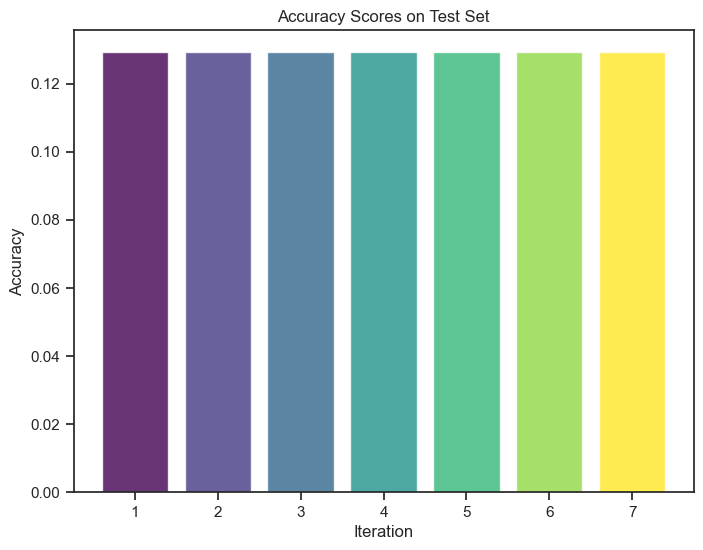

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

scores = []

for everyList in test_predictions:
    predictions=model.predict(pd.DataFrame((everyList, y_pred_rf_test)).transpose())
    predictions=np.argmax(predictions,axis=1)
    score = accuracy_score(predictions,y_test)
    scores.append(score)

plt.figure(figsize=[8,6])
plt.bar(np.arange(len(scores)), scores, align='center', alpha=0.8, color=plt.cm.viridis(np.linspace(0, 1, len(scores))))
plt.xticks(np.arange(len(scores)), np.arange(1, len(scores)+1))
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores on Test Set')
plt.show()

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle  # Import the shuffle function

# Set a fixed random seed for NumPy and TensorFlow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

best_accuracies_3 = []

y_train_encoded = to_categorical(y_train, num_classes=7)
y_val_encoded = to_categorical(y_val, num_classes=7)

for everyList in range(len(train_predictions)):
    X_combined = pd.DataFrame((train_predictions[everyList], y_pred_rf_test)).transpose()
    X_combined_val = pd.DataFrame((val_predictions[everyList], y_pred_rf_val)).transpose()

    model = Sequential()
    model.add(Dense(20, input_shape=(X_combined.shape[1],), activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(7, activation='softmax'))


    learning_rate = 0.001
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Shuffle the data before each epoch to introduce randomness
    X_combined_shuffled, y_train_encoded_shuffled = shuffle(X_combined, y_train_encoded)
    X_combined_shuffled, y_train_encoded_shuffled = shuffle(X_combined_val.values, y_val_encoded)

    # Assuming you have the validation data as a list of numpy arrays, val_data_list
    # Concatenate the validation data into a single numpy array
    X_combined_val_array = X_combined_val.values

    history = model.fit(X_combined_shuffled, y_train_encoded_shuffled, epochs=10, batch_size=32, validation_data=(X_combined_val_array, y_val_encoded))

    best_accuracy = max(history.history['val_accuracy'])   # Get the best accuracy from the training history
    best_accuracies_3.append(best_accuracy)

Epoch 1/10
47/47 [==============================] - 1s 6ms/step - loss: 1.8135 - accuracy: 0.2296 - val_loss: 1.6720 - val_accuracy: 0.3418
Epoch 2/10
47/47 [==============================] - 0s 3ms/step - loss: 1.5806 - accuracy: 0.3792 - val_loss: 1.5107 - val_accuracy: 0.4419
Epoch 3/10
47/47 [==============================] - 0s 3ms/step - loss: 1.4681 - accuracy: 0.4680 - val_loss: 1.4520 - val_accuracy: 0.4599
Epoch 4/10
47/47 [==============================] - 0s 3ms/step - loss: 1.3528 - accuracy: 0.5334 - val_loss: 1.2531 - val_accuracy: 0.6709
Epoch 5/10
47/47 [==============================] - 0s 3ms/step - loss: 1.2049 - accuracy: 0.6696 - val_loss: 1.1676 - val_accuracy: 0.6943
Epoch 6/10
47/47 [==============================] - 0s 3ms/step - loss: 1.0839 - accuracy: 0.6896 - val_loss: 1.0086 - val_accuracy: 0.7463
Epoch 7/10
47/47 [==============================] - 0s 3ms/step - loss: 0.9817 - accuracy: 0.7316 - val_loss: 0.9294 - val_accuracy: 0.7550
Epoch 8/10
47/47 [==

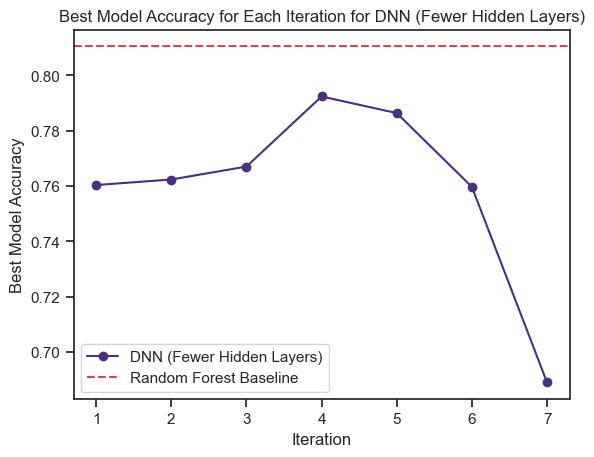

In [110]:
# Plotting the results
plt.figure()
plt.plot(range(1, len(best_accuracies_3) + 1), best_accuracies_3, marker='o', label='DNN (Fewer Hidden Layers)')
plt.axhline(accuracy_test, color='r', linestyle='dashed', label='Random Forest Baseline')
plt.xlabel('Iteration')
plt.ylabel('Best Model Accuracy')
plt.title('Best Model Accuracy for Each Iteration for DNN (Fewer Hidden Layers)')
plt.legend()
plt.show()

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle  # Import the shuffle function

# Set a fixed random seed for NumPy and TensorFlow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

best_accuracies_3 = []

y_train_encoded = to_categorical(y_train, num_classes=7)
y_val_encoded = to_categorical(y_val, num_classes=7)

for everyList in range(len(train_predictions)):
    X_combined = pd.DataFrame((train_predictions[everyList], y_pred_rf_test)).transpose()
    X_combined_val = pd.DataFrame((val_predictions[everyList], y_pred_rf_val)).transpose()

    model = Sequential()
    model.add(Dense(40, input_shape=(X_combined.shape[1],), activation='tanh'))
    model.add(Dense(40, activation='tanh'))
    model.add(Dense(40, activation='tanh'))
    model.add(Dense(40, activation='tanh'))
    model.add(Dense(40, activation='tanh'))
    model.add(Dense(40, activation='tanh'))
    model.add(Dense(40, activation='tanh'))
    model.add(Dense(7, activation='softmax'))


    learning_rate = 0.001
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Shuffle the data before each epoch to introduce randomness
    X_combined_shuffled, y_train_encoded_shuffled = shuffle(X_combined, y_train_encoded)
    X_combined_shuffled, y_train_encoded_shuffled = shuffle(X_combined_val.values, y_val_encoded)

    # Assuming you have the validation data as a list of numpy arrays, val_data_list
    # Concatenate the validation data into a single numpy array
    X_combined_val_array = X_combined_val.values

    history = model.fit(X_combined_shuffled, y_train_encoded_shuffled, epochs=10, batch_size=32, validation_data=(X_combined_val_array, y_val_encoded))

    best_accuracy = max(history.history['val_accuracy'])   # Get the best accuracy from the training history
    best_accuracies_3.append(best_accuracy)

Epoch 1/10
47/47 [==============================] - 1s 5ms/step - loss: 1.8731 - accuracy: 0.2183 - val_loss: 1.7475 - val_accuracy: 0.2623
Epoch 2/10
47/47 [==============================] - 0s 3ms/step - loss: 1.5971 - accuracy: 0.3425 - val_loss: 1.4459 - val_accuracy: 0.4673
Epoch 3/10
47/47 [==============================] - 0s 3ms/step - loss: 1.3688 - accuracy: 0.5828 - val_loss: 1.2609 - val_accuracy: 0.6215
Epoch 4/10
47/47 [==============================] - 0s 3ms/step - loss: 1.1685 - accuracy: 0.6796 - val_loss: 1.0753 - val_accuracy: 0.7350
Epoch 5/10
47/47 [==============================] - 0s 2ms/step - loss: 1.0258 - accuracy: 0.7056 - val_loss: 1.0031 - val_accuracy: 0.6402
Epoch 6/10
47/47 [==============================] - 0s 3ms/step - loss: 0.9171 - accuracy: 0.7377 - val_loss: 0.9071 - val_accuracy: 0.7216
Epoch 7/10
47/47 [==============================] - 0s 3ms/step - loss: 0.8530 - accuracy: 0.7577 - val_loss: 0.8107 - val_accuracy: 0.7510
Epoch 8/10
47/47 [==

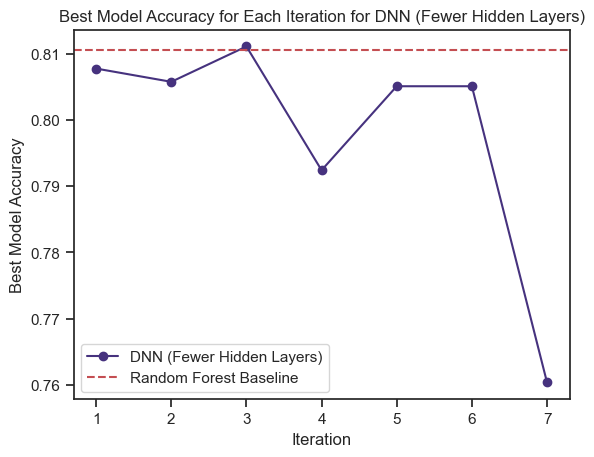

In [112]:
# Plotting the results
plt.figure()
plt.plot(range(1, len(best_accuracies_3) + 1), best_accuracies_3, marker='o', label='DNN (Fewer Hidden Layers)')
plt.axhline(accuracy_test, color='r', linestyle='dashed', label='Random Forest Baseline')
plt.xlabel('Iteration')
plt.ylabel('Best Model Accuracy')
plt.title('Best Model Accuracy for Each Iteration for DNN (Fewer Hidden Layers)')
plt.legend()
plt.show()

In [113]:
from sklearn.metrics import accuracy_score
 
for everyList in test_predictions:
    predictions=model.predict(pd.DataFrame((everyList, y_pred_rf_test)).transpose())
    #print(predictions)
    predictions=np.argmax(predictions,axis=1)
    print(predictions)
    print(y_test)
    print(accuracy_score(predictions,y_test))

48/48 [==============================] - 0s 851us/step
[2 2 0 ... 4 3 3]
Id
8405     2
13220    2
7650     0
14941    2
12548    3
        ..
11604    0
13693    5
2348     4
12422    3
3602     3
Name: Cover_Type, Length: 1525, dtype: int64
0.6931147540983607
48/48 [==============================] - 0s 851us/step
[2 2 0 ... 4 3 3]
Id
8405     2
13220    2
7650     0
14941    2
12548    3
        ..
11604    0
13693    5
2348     4
12422    3
3602     3
Name: Cover_Type, Length: 1525, dtype: int64
0.7068852459016394
48/48 [==============================] - 0s 787us/step
[2 2 0 ... 4 3 3]
Id
8405     2
13220    2
7650     0
14941    2
12548    3
        ..
11604    0
13693    5
2348     4
12422    3
3602     3
Name: Cover_Type, Length: 1525, dtype: int64
0.7140983606557377
48/48 [==============================] - 0s 766us/step
[2 2 0 ... 4 3 3]
Id
8405     2
13220    2
7650     0
14941    2
12548    3
        ..
11604    0
13693    5
2348     4
12422    3
3602     3
Name: Cover_Type, Le

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle  # Import the shuffle function

# Set a fixed random seed for NumPy and TensorFlow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

best_accuracies_4 = []

y_train_encoded = to_categorical(y_train, num_classes=7)
y_val_encoded = to_categorical(y_val, num_classes=7)

for everyList in range(len(train_predictions)):
    X_combined = pd.DataFrame((train_predictions[everyList], y_pred_rf_test)).transpose()
    X_combined_val = pd.DataFrame((val_predictions[everyList], y_pred_rf_val)).transpose()

    model = Sequential()
    model.add(Dense(64, input_shape=(X_combined.shape[1],), activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(7, activation='softmax'))


    learning_rate = 0.001
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Shuffle the data before each epoch to introduce randomness
    X_combined_shuffled, y_train_encoded_shuffled = shuffle(X_combined, y_train_encoded)
    X_combined_shuffled, y_train_encoded_shuffled = shuffle(X_combined_val.values, y_val_encoded)

    # Assuming you have the validation data as a list of numpy arrays, val_data_list
    # Concatenate the validation data into a single numpy array
    X_combined_val_array = X_combined_val.values

    history = model.fit(X_combined_shuffled, y_train_encoded_shuffled, epochs=10, batch_size=32, validation_data=(X_combined_val_array, y_val_encoded))

    best_accuracy = max(history.history['val_accuracy'])   # Get the best accuracy from the training history
    best_accuracies_4.append(best_accuracy)

Epoch 1/10
47/47 [==============================] - 1s 6ms/step - loss: 1.8009 - accuracy: 0.2563 - val_loss: 1.5263 - val_accuracy: 0.4813
Epoch 2/10
47/47 [==============================] - 0s 3ms/step - loss: 1.4021 - accuracy: 0.5107 - val_loss: 1.2171 - val_accuracy: 0.6275
Epoch 3/10
47/47 [==============================] - 0s 3ms/step - loss: 1.0438 - accuracy: 0.6769 - val_loss: 0.9255 - val_accuracy: 0.7410
Epoch 4/10
47/47 [==============================] - 0s 3ms/step - loss: 0.8530 - accuracy: 0.7483 - val_loss: 0.7471 - val_accuracy: 0.7510
Epoch 5/10
47/47 [==============================] - 0s 3ms/step - loss: 0.7578 - accuracy: 0.7550 - val_loss: 0.9557 - val_accuracy: 0.5614
Epoch 6/10
47/47 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.7597 - val_loss: 0.7007 - val_accuracy: 0.7864
Epoch 7/10
47/47 [==============================] - 0s 3ms/step - loss: 0.6565 - accuracy: 0.7864 - val_loss: 0.6263 - val_accuracy: 0.7623
Epoch 8/10
47/47 [==

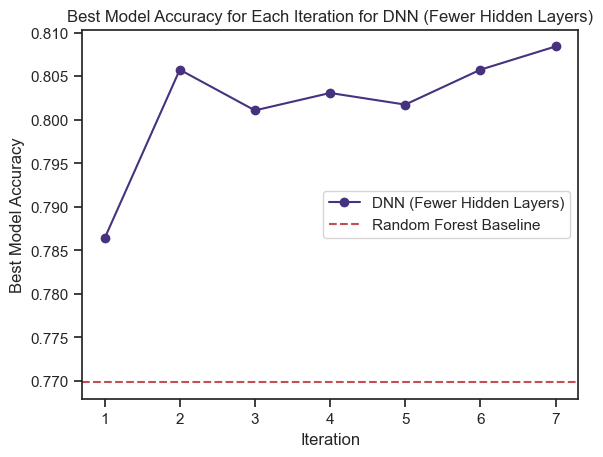

In [116]:
# Plotting the results
plt.figure()
plt.plot(range(1, len(best_accuracies_4) + 1), best_accuracies_4, marker='o', label='DNN (Fewer Hidden Layers)')
plt.axhline(accuracy, color='r', linestyle='dashed', label='Random Forest Baseline')
plt.xlabel('Iteration')
plt.ylabel('Best Model Accuracy')
plt.title('Best Model Accuracy for Each Iteration for DNN (Fewer Hidden Layers)')
plt.legend()
plt.show()

In [117]:
from sklearn.metrics import accuracy_score
 
for everyList in test_predictions:
    predictions=model.predict(pd.DataFrame((everyList, y_pred_rf_test)).transpose())
    #print(predictions)
    predictions=np.argmax(predictions,axis=1)

    print(accuracy_score(predictions,y_test))

48/48 [==============================] - 0s 904us/step
0.7029508196721311
48/48 [==============================] - 0s 876us/step
0.740327868852459
48/48 [==============================] - 0s 873us/step
0.7396721311475409
48/48 [==============================] - 0s 850us/step
0.7265573770491803
48/48 [==============================] - 0s 872us/step
0.7377049180327869
48/48 [==============================] - 0s 852us/step
0.7449180327868853
48/48 [==============================] - 0s 926us/step
0.7462295081967213


In [118]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle  # Import the shuffle function

# Set a fixed random seed for NumPy and TensorFlow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

best_accuracies_3 = []

y_train_encoded = to_categorical(y_train, num_classes=7)
y_val_encoded = to_categorical(y_val, num_classes=7)

for everyList in range(len(train_predictions)):
    X_combined = pd.DataFrame((train_predictions[everyList], y_pred_rf_test)).transpose()
    X_combined_val = pd.DataFrame((val_predictions[everyList], y_pred_rf_val)).transpose()

    model = Sequential()
    model.add(Dense(64, input_shape=(X_combined.shape[1],), activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(7, activation='softmax'))


    learning_rate = 0.003
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Shuffle the data before each epoch to introduce randomness
    X_combined_shuffled, y_train_encoded_shuffled = shuffle(X_combined, y_train_encoded)
    X_combined_shuffled, y_train_encoded_shuffled = shuffle(X_combined_val.values, y_val_encoded)

    # Assuming you have the validation data as a list of numpy arrays, val_data_list
    # Concatenate the validation data into a single numpy array
    X_combined_val_array = X_combined_val.values

    history = model.fit(X_combined_shuffled, y_train_encoded_shuffled, epochs=10, batch_size=32, validation_data=(X_combined_val_array, y_val_encoded))

    best_accuracy = max(history.history['val_accuracy'])   # Get the best accuracy from the training history
    best_accuracies_3.append(best_accuracy)

Epoch 1/10
47/47 [==============================] - 1s 6ms/step - loss: 1.6652 - accuracy: 0.3124 - val_loss: 1.2604 - val_accuracy: 0.5207
Epoch 2/10
47/47 [==============================] - 0s 3ms/step - loss: 1.2031 - accuracy: 0.5367 - val_loss: 1.0029 - val_accuracy: 0.5834
Epoch 3/10
47/47 [==============================] - 0s 3ms/step - loss: 0.9763 - accuracy: 0.6615 - val_loss: 1.0232 - val_accuracy: 0.5401
Epoch 4/10
47/47 [==============================] - 0s 3ms/step - loss: 0.8828 - accuracy: 0.6809 - val_loss: 0.7623 - val_accuracy: 0.7490
Epoch 5/10
47/47 [==============================] - 0s 3ms/step - loss: 0.9469 - accuracy: 0.6555 - val_loss: 0.7160 - val_accuracy: 0.7517
Epoch 6/10
47/47 [==============================] - 0s 3ms/step - loss: 1.0738 - accuracy: 0.6696 - val_loss: 2.6508 - val_accuracy: 0.1789
Epoch 7/10
47/47 [==============================] - 0s 3ms/step - loss: 1.8086 - accuracy: 0.2523 - val_loss: 1.5335 - val_accuracy: 0.2857
Epoch 8/10
47/47 [==

In [119]:
from sklearn.metrics import accuracy_score
 
for everyList in test_predictions:
    predictions=model.predict(pd.DataFrame((everyList, y_pred_rf_test)).transpose())
    #print(predictions)
    predictions=np.argmax(predictions,axis=1)
    print(predictions)
    print(y_test)
    print(accuracy_score(predictions,y_test))

48/48 [==============================] - 0s 912us/step
[2 2 0 ... 4 3 3]
Id
8405     2
13220    2
7650     0
14941    2
12548    3
        ..
11604    0
13693    5
2348     4
12422    3
3602     3
Name: Cover_Type, Length: 1525, dtype: int64
0.7114754098360656
48/48 [==============================] - 0s 894us/step
[2 2 1 ... 3 3 3]
Id
8405     2
13220    2
7650     0
14941    2
12548    3
        ..
11604    0
13693    5
2348     4
12422    3
3602     3
Name: Cover_Type, Length: 1525, dtype: int64
0.7180327868852459
48/48 [==============================] - 0s 1ms/step
[2 2 1 ... 4 4 3]
Id
8405     2
13220    2
7650     0
14941    2
12548    3
        ..
11604    0
13693    5
2348     4
12422    3
3602     3
Name: Cover_Type, Length: 1525, dtype: int64
0.740327868852459
48/48 [==============================] - 0s 936us/step
[2 2 1 ... 4 3 3]
Id
8405     2
13220    2
7650     0
14941    2
12548    3
        ..
11604    0
13693    5
2348     4
12422    3
3602     3
Name: Cover_Type, Lengt

# Q1)

 Initialize ,fit five different classifiers (KNN, Logistic Regression, SVM, Decision Tree, and Naive Bayes) on the training data and then predicts the target variable for the test data using each of these classifiers. The accuracy of each method is then calculated using the accuracy_score() function from scikit-learn. Finally, a confusion matrix is computed for each method using the confusion_matrix() function also from scikit-learn. we create a bar chart to compare the baseline performances of the five classifiers on the test data. The chart shows the accuracy score for each classifier.Accuracy_dt=0.759344262295082
 accuracy_knn=0.7383606557377049
 accuracy_nb=0.6013114754098361
 accuracy_svm=0.5613114754098361
 accuracy_logreg=0.4740983606557377 
 then we use Decision Tree and KNN Becouse they are the highest Accuracy

# Q2)

Scaling the features to improve the performance of some machine learning algorithms and avoid the 
dominance of some features over others due to differences in their scales.
Performing PCA for dimensionality reduction can help reduce the number of features in the dataset 
while retaining most of the variance in the data. This can help improve the performance of some 
machine learning algorithms and reduce the risk of overfitting.
We use two best-performing machine learning models  on the original 
feature set. The two models selected are the DecisionTreeClassifier and KNeighborsClassifier
We applie filter-based feature selection using the SelectKBest . to perform filter-based feature selection 
using SelectKBest and evaluates the performance of two machine learning models 
(DecisionTreeClassifier and KNeighborsClassifier) on both the original feature set and reduced feature 
sets. The code can be used to compare the performance of different feature selection methods and 
identify which features are most important for the models.
wrapper-based feature selection using Recursive Feature Elimination (RFE) and evaluates the 
performance of two machine learning models (DecisionTreeClassifier and KNeighborsClassifier) for 
different numbers of selected features.

# Q3)

we apply Random Forest classifier on a training set and evaluate its performance on bo
th a validation set and a test set. The use of separate validation and test s
ets helps to ensure that the model's performance is not overfit to the traini
ng data and can generalize well to new, unseen data. Validation Set Accuracy: 
0.815086782376502
Test Set Accuracy: 0.8137704918032787
 
 apply The ExtraTreesClassifier is an ensemble learning method that constru
cts a multitude of decision trees at training time and outputs the class that 
is the mode of the classes (classification) or mean prediction (regression) o
f the individual trees. ExtraTrees Accuracy: 0.8111475409836065
And The GradientBoostingClassifier is another ensemble learning method that builds an 
additive model in a forward stage-wise fashion. It allows for the optimization of 
arbitrary differentiable loss functions and provides several hyperparameters that 
control the complexity of the model, including n_estimators, which controls the 
number of boosting stages to perform, and learning_rate, which controls the 
contribution of each classifier to the final ensemble.
Gradient Boosting Accuracy: 0.769836065573770

# Q4,Q5)

we use combination of random forest prediction and sofm structure as an input for dnn
which random forest is the best model among supervised model.defualt neural Network was done which eventually resulted in overfitting accuracy


main Model: The first model with the architecture consisting of 30 hidden units (Dense(30, activation='tanh')) leads to overfitting. The accuracy on the training data is significantly higher than the accuracy on the validation data. This suggests that the model has memorized the training data and is not generalizing well to unseen data.

--appling parameter fine tuning

first Model (best_accuracies_3): The second model with the architecture consisting of 20 hidden units (Dense(20, activation='tanh')) performs better than the first model and shows some improvement. The accuracy on the validation data is higher compared to the first model, which indicates better generalization.

second Model (best_accuracies_3): The third model with the architecture consisting of 40 hidden units (Dense(40, activation='tanh')) also shows an improvement in accuracy compared to the first model but has slightly lower accuracy compared to the second model (best_accuracies_3).

third Model (best_accuracies_4): The fourth model with the architecture consisting of 64 hidden units (Dense(64, activation='tanh')) performs worse than the previous models. The accuracy is lower, indicating that increasing the number of hidden units might not always lead to better performance, and it may lead to overfitting.

In summary:

The second model (best_accuracies_3) with 20 hidden units seems to be the best performing model among the ones tested.
The third model (best_accuracies_3) with 40 hidden units also performs reasonably well but doesn't outperform the second model.
The fourth model (best_accuracies_4) with 64 hidden units is the worst performing one, indicating that adding more hidden units does not necessarily improve performance and may lead to overfitting.

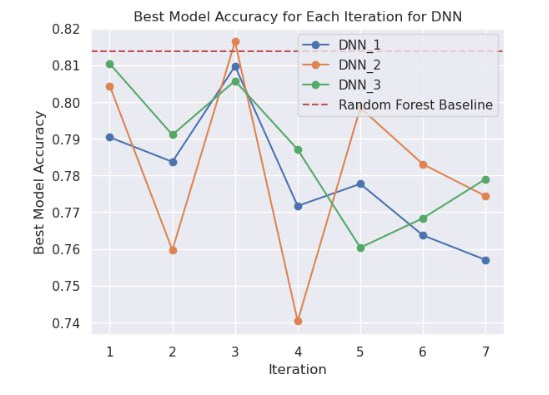

One of my team apply this part using validation data that is used as subset of train set using validation_split = 0.3
But we ignore this and used validation data instead